In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data= pd.read_csv("Salary_Data.csv")

In [4]:
X= data.iloc[:,[1]].values
Y= data.iloc[:,1:].values

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=0,test_size=0.2)

In [25]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train.reshape(-1,1), y_train.reshape(-1,1))

C:\Users\Aakansha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [27]:
y_pred = regressor.predict(x_test.reshape(-1,1))

In [28]:
df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df

,Real Values,Predicted Values
0,37731.0,41072.4
1,122391.0,117161.6
2,57081.0,57087.9
3,63218.0,63173.7
4,116969.0,112896.2
5,109431.0,109360.2


In [29]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,y_test)

9184383.483333329

In [30]:
from sklearn.metrics import mean_absolute_error
mean_squared_error(y_pred, y_test)

9184383.483333329

In [31]:
from sklearn.metrics import mean_squared_error
from math import sqrt
R=mean_squared_error(y_pred, y_test)
root_mean_squared_error = sqrt(R)
root_mean_squared_error

3030.574777716816

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LinearRegression(),X,Y,scoring ="r2")

C:\Users\Aakansha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [38]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

1.00 accuracy with a standard deviation of 0.00


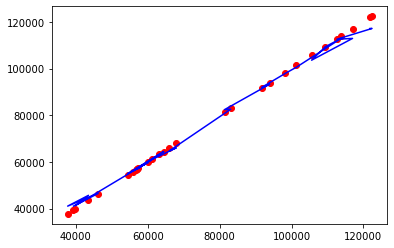

In [37]:
plt.scatter(X, Y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')